<a href="https://colab.research.google.com/github/Welle-Kim/Python/blob/master/Hand_str_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손글씨 인식 신경망 적용해보기(교재 92p~)

## MNIST
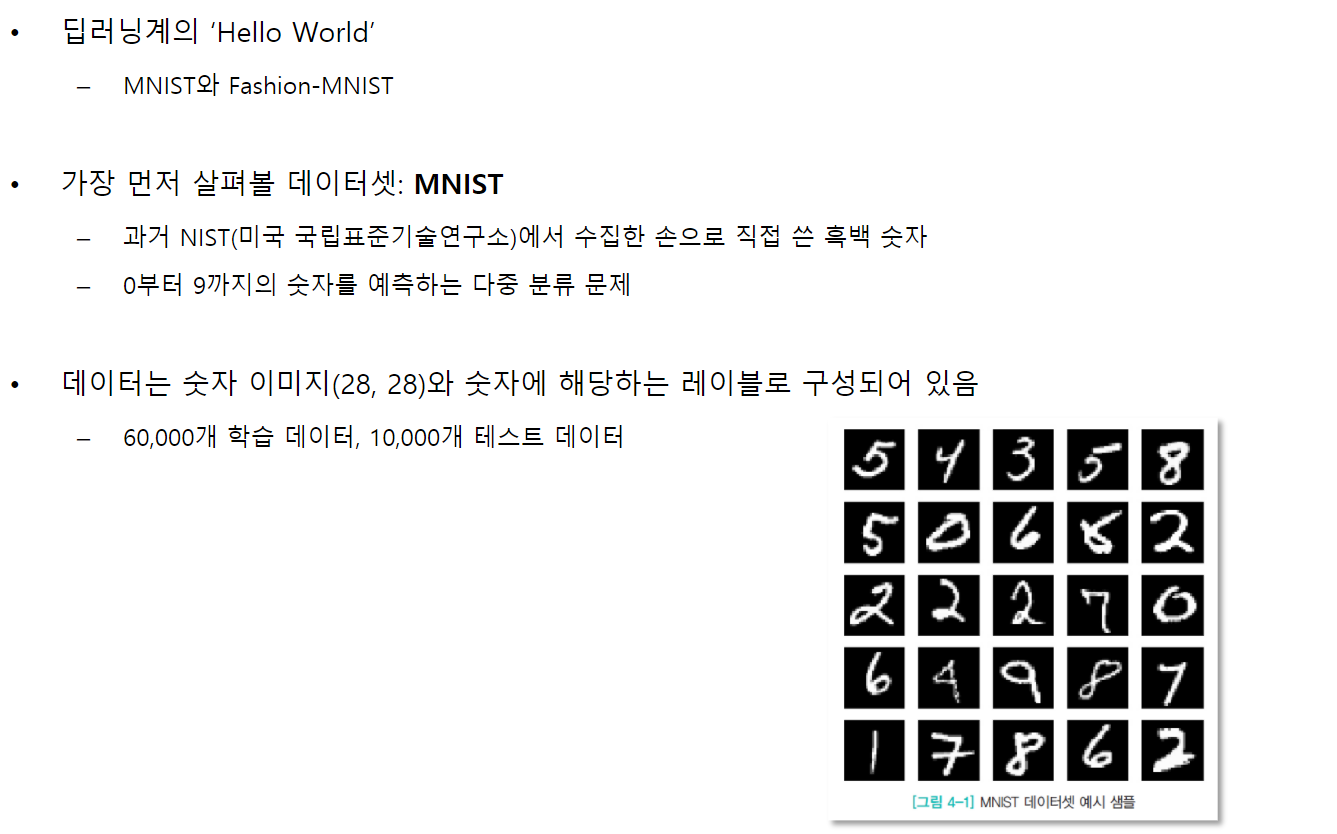

### MNIST 데이터셋 다운로드
- 케라스에서 제공하는 데이터셋은 전부 tf.keras.datasets를 통해 접근 가능   
- load_data() 함수는 (x_train, y_train), (x_test, y_test) 형태로 분할해서 제공

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data

# 텐서블로우 데이터셋에서 데이터 다운받기
#mnist=tf.keras.datasets.mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

### 데이터 형태 확인
- 데이터, 레이블가 어떻게 구성되어 있는지 확인해보는 과정은
필수!
- 제공되는 코드를 통해 데이터를 그려보세요.

In [ ]:
# 훈련데이터 구성 확인
x_train.shape, y_train.shape

In [ ]:
y_train

In [ ]:
# 테스트 데이터 확인
print(x_test.shape, y_test.shape)
print(y_test)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_train[0])
plt.show()
print("label:",y_train[0])

In [ ]:
plt.imshow(np.hstack(x_train[:5]))
plt.show()
print("label:",y_train[:5])

In [ ]:
## 6만개의 데이터에서 임의로 두개의 데이터를 뽑아서 확인하기
np.random.seed(123)
random_idx=np.random.randint(60000,size=2)

for idx in random_idx:
  img=x_train[idx,:]
  label=y_train[idx]
  plt.imshow(img)
  plt.title(f"data-{idx},label-{label}",fontsize=15)
  plt.show()

In [ ]:
# 테스트 데이터 확인
np.random.seed(123)
random_idx = np.random.randint(10000)

img = x_test[random_idx, :]
label = y_test[random_idx]
plt.imshow(img)
plt.title(f'data-{random_idx}, label-{label}', fontsize=15)
plt.show()

#### 모델 검증을 위해 검증 데이터셋을 만듭니다
- train_test_split() 함수 사용
- test_size: 테스트 데이터셋 비율
- random_state: 재생산성

In [ ]:
# 훈련 데이터/검증 데이터 생성
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=123)
print(f"훈련데이터:{x_train.shape},레이블:{y_train.shape}")
print(f"검증데이터:{x_val.shape},레이블:{y_val.shape}")

In [ ]:
x_train.shape

In [ ]:
x_train.shape[0]

In [ ]:
#1개의 이미지 데이터 정보 차원변경
timg=x_train[0].reshape(-1,28*28)
print(timg.shape)
timg.reshape(28,-1).shape

In [ ]:
print(x_train.shape)
xtrainNum=x_train.shape[0] #이미지 갯수
xvalNum=x_val.shape[0]
xtestNum=x_test.shape[0]

#모델에 적용할 데이터로 변경
xr_train=x_train.reshape(xtrainNum,28*28)/255 #차원변경 및 정규화
xr_val=x_val.reshape(xvalNum,28*28)/255 #차원변경 및 정규화
xr_test=x_test.reshape(xtestNum,28*28)/255 #차원변경 및 정규화

print('차원 변경후:', xr_train.shape)

#### 학습을 위해 전처리를 수행해야 함
- 255로 나눠주어 0~1사이로 스케일 조정
- 신경망은 스케일에 매우 민감!
- Dense 층 사용을 위해 784차원의 1차원 배열로 변환 

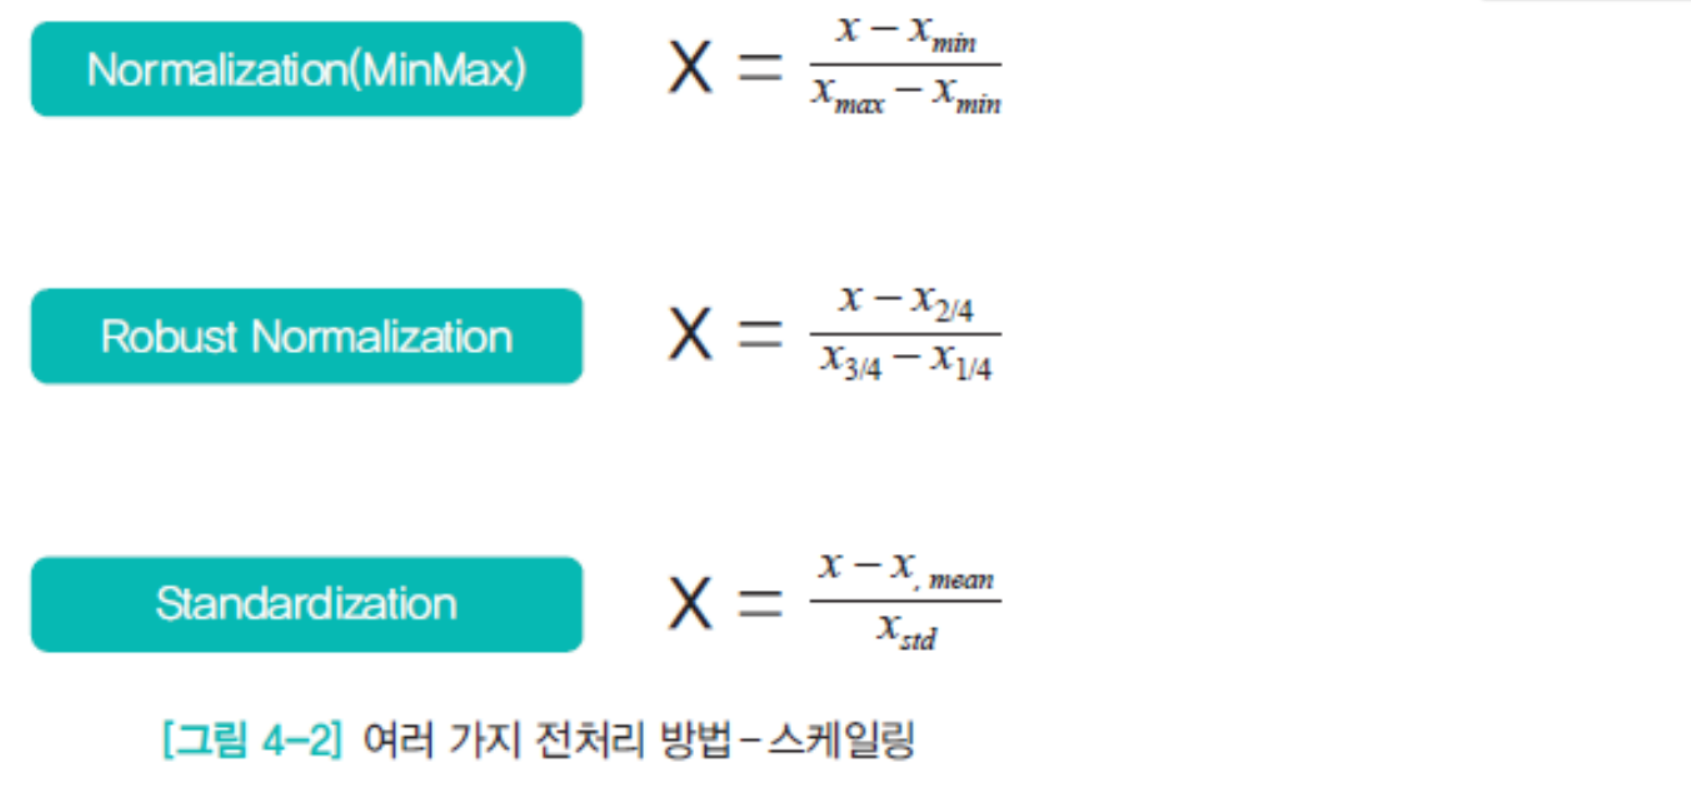

####  모델 입력을 위한 레이블 전처리

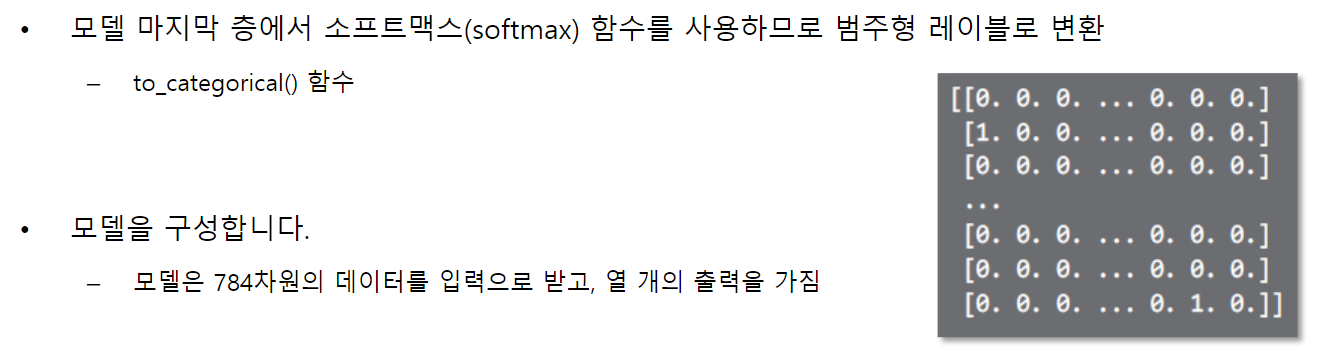

In [ ]:
# 소프트맥스 함수
def softmax(arr):
    m = np.max(arr)
    arr = arr-m
    arr = np.exp(arr)
    return arr/np.sum(arr)

# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))

c1=np.array([3.1,3.0,2.9])
c2=np.array([2.0,1.0,0.7])

# np.데이터에서 소수 3째자리에서 반올림
np.set_printoptions(precision=3)
print(f"sigmoid:{sigmoid(c1)},softmax:{softmax(c1)}") 
print(f"sigmoid:{sigmoid(c2)},softmax:{softmax(c2)}") 

In [ ]:
from tensorflow.keras.utils import to_categorical

# 레이블 데이터를 범주형 형식으로 변경(원핫인코딩)
yc_train = to_categorical(y_train)
yc_val = to_categorical(y_val)
yc_test = to_categorical(y_test)

print(y_train)
print(yc_train[0])

In [ ]:
#텐서플로를 이용한 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#모델 생성을 위한 단계별(layer)생성
model=Sequential()
model.add(Dense(64,activation="relu",input_shape=(784,))) #input_layers: 입력x=784 변수, unit(출력)=64 
model.add(Dense(32,activation="relu")) # hidden_layers1 : 입력 x=64,출력(unit)=32
model.add(Dense(16,activation="relu")) # hidden_layers1 : 입력 x=64,출력(unit)=16
model.add(Dense(10,activation="softmax")) 

## 모델 구하기

##### 시그모이드, 소프트맥스 함수
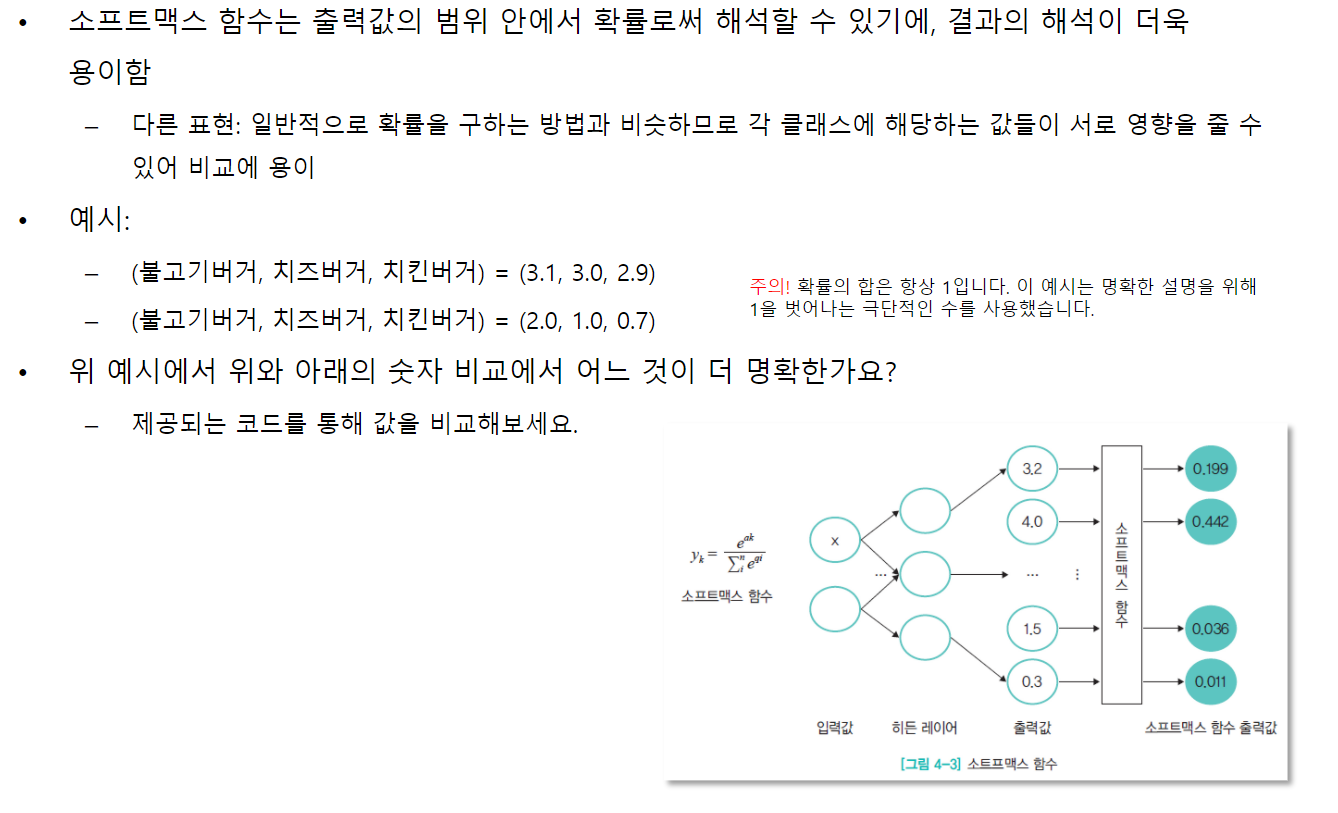

## 학습과정 설정하기

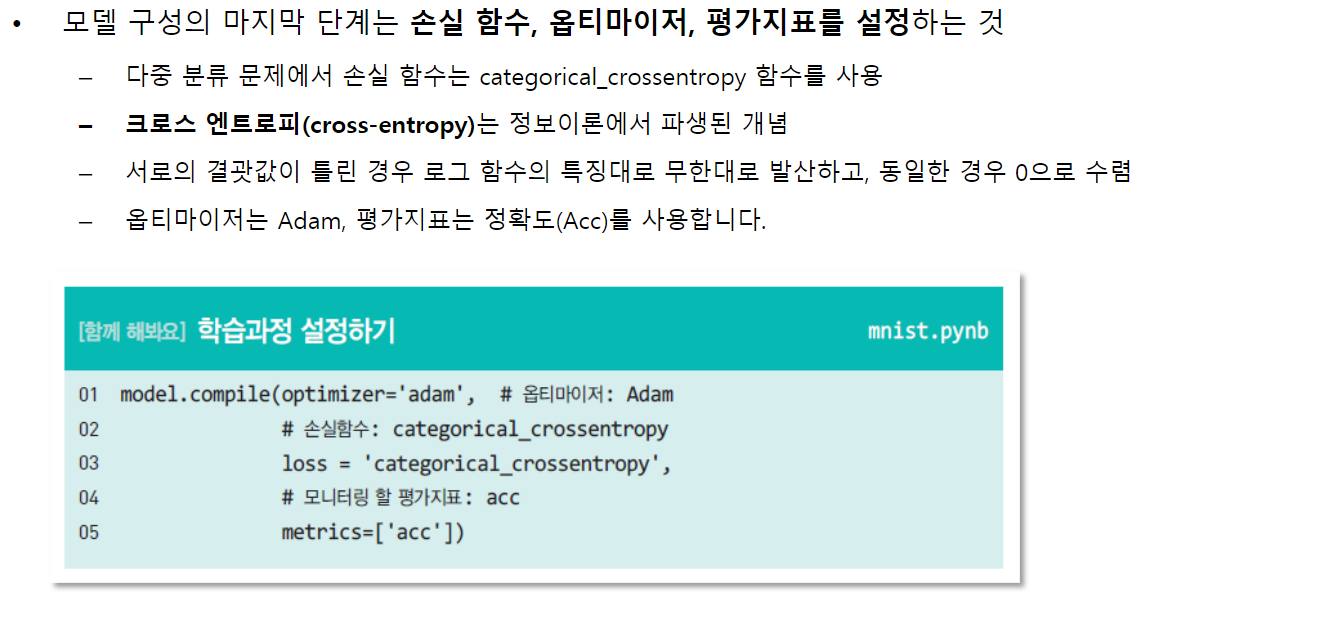

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
               metrics=['acc'])

In [ ]:
np.max(xr_train), np.min(xr_train)

#### 모델 학습하기
- validation_data에 검증 데이터셋을 전달하고, 128 배치크기를 사용하며, 전체 데이터를 30회 반복

In [ ]:
from traitlets.traitlets import validate
history = model.fit(xr_train, yc_train,
                     epochs=30, 
                     batch_size=128,
                     validation_data =(xr_val, yc_val))

In [ ]:
##모델 저장
model.save("minist_model.h5")

#### 학습 결과 그리기
- model.fit() 함수는 History 객체를 전달합니다. 이를 활용하여 학습 과정을 손쉽게 모니터링 할 수 있음

In [ ]:
history.history.keys()

### 모델 평가하기

In [ ]:
model.evaluate(xr_test, yc_test)

### 학습된 모델을 통한 값 예측하기

In [ ]:
np.set_printoptions(precision=7)

results=model.predict(xr_test)

print(results.shape)
print(y_test[0])
print(results[0])


#### 예측값 그려서 확인하기

In [ ]:
import matplotlib.pyplot as plt

arg_results=np.argmax(results,axis=-1) #가장 큰값의 index값을 반환
plt.imshow(xr_test[0].reshape(28,28))
plt.title("Predicted Values:"+str(arg_results[0]),fontsize=15)

In [ ]:
from keras.models import load_model
from PIL import Image,ImageOps
import matplotlib.pyplot as plt

import numpy as np

model=load_model("minist_model.h5")
# data=np.nparray(shape=(1,28,28,1))

img=Image.open("white.jpeg")
plt.imshow(img)
np.array(img)

In [ ]:
from keras.models import load_model
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import numpy as np

img=Image.open("white.jpeg").convert("L") #conver("L"):grayscale로 변경해서 일겅옴

plt.imshow(img,cmap="gray")
np.array(img)

In [ ]:
# #이미지 크기 28*28로 변경
# # img2=np.resize(img,(1,784))
# # img2
# img2=img.resize((28,28))
# plt.imshow(img2,cmap="gray")

In [ ]:
# 모델 읽어오기
model = load_model('minist_model.h5')

# 이미지 크기 28*28로 변경
img2=img.resize((28,28))
# plt.imshow(img2, cmap='gray')

img2arr=np.array(img2).reshape(1, 28*28)/255
img2arr.shape


In [ ]:
preds=model.predict(img2arr)
print(preds)

In [ ]:
class_name=[0,1,2,3,4,5,6,7,8,9]
print(class_name[np.argmax(preds)])

again

In [ ]:
from keras.models import load_model
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import numpy as np

img=Image.open("weiss.jpeg").convert("L") #conver("L"):grayscale로 변경해서 일겅옴

plt.imshow(img,cmap="gray")
np.array(img)

In [ ]:
# 모델 읽어오기
model = load_model('minist_model.h5')

# 이미지 크기 28*28로 변경
img2=img.resize((28,28))
# plt.imshow(img2, cmap='gray')

img2arr=np.array(img2).reshape(1, 28*28)/255
img2arr.shape


In [ ]:
preds=model.predict(img2arr)
print(preds)

In [ ]:
class_name=[0,1,2,3,4,5,6,7,8,9]
print(class_name[np.argmax(preds)])